In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (그래프에 한글이 깨지지 않도록)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

DataFrame

In [28]:
df = pd.read_csv('C:\\Users\\user\\jupyter\\traintest2.csv')
# pum = df.columns[2:]
feature = df.columns[2:]
df

,date,요일,사과_거래량(kg),사과_가격(원/kg),참외_거래량(kg),참외_가격(원/kg),감귤_거래량(kg),감귤_가격(원/kg),바나나_거래량(kg),바나나_가격(원/kg),복숭아_거래량(kg),복숭아_가격(원/kg),참다래(키위)_거래량(kg),참다래(키위)_가격(원/kg),자두_거래량(kg),자두_가격(원/kg),파인애플_거래량(kg),파인애플_가격(원/kg)
0,2020-01-01,수요일,825.0,2448.484848,0.0,0.000000,10470.0,1122.015282,0.00,0.000000,0.0,0.000000,100.0,3000.000000,10.0,6000.000000,0.0,0.000000
1,2020-01-02,목요일,154069.0,2275.880287,0.0,0.000000,490551.0,1435.725541,76958.00,1586.287326,0.0,0.000000,2338.0,3534.003422,0.0,0.000000,9908.0,2383.903916
2,2020-01-03,금요일,1339920.6,2269.287621,2810.0,4431.565836,2909403.5,1510.838187,982323.82,1196.893424,210.0,1328.571429,51675.0,4176.686986,0.0,0.000000,165875.0,1698.416880
3,2020-01-04,토요일,1170418.6,1579.113430,4250.0,2709.200000,2346012.0,1449.691395,278398.50,1279.658619,3.0,3000.000000,35562.0,3250.087172,15.0,11933.333333,62525.0,1803.984006
4,2020-01-06,월요일,2327831.8,1928.874616,1645.0,2133.860182,2753931.8,1571.947094,779825.70,1082.430676,0.0,0.000000,52929.3,3089.778629,6.0,4000.000000,130878.0,1709.042009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,2023-12-26,화요일,746209.7,4392.127643,1480.0,6920.945946,1665995.5,3258.773479,366638.30,1715.499903,0.0,0.000000,38069.5,7755.670025,0.0,0.000000,90273.1,1987.074887
1241,2023-12-27,수요일,965643.4,4437.711167,840.0,5126.190476,1759013.1,3421.746541,353085.12,1726.744106,0.0,0.000000,29649.3,6148.492545,0.0,0.000000,78907.3,1921.576077
1242,2023-12-28,목요일,1031091.4,4329.066917,560.0,4456.250000,1958986.9,3496.582489,455794.90,1762.023853,0.0,0.000000,25833.5,6064.967194,8.0,5000.000000,85765.8,2078.887622
1243,2023-12-29,금요일,782892.4,4218.256685,600.0,6546.666667,2198564.0,3573.940522,538209.50,1591.076642,0.0,0.000000,27484.9,6197.763135,0.0,0.000000,127238.1,1824.459812


1. 품목별 가격 비교

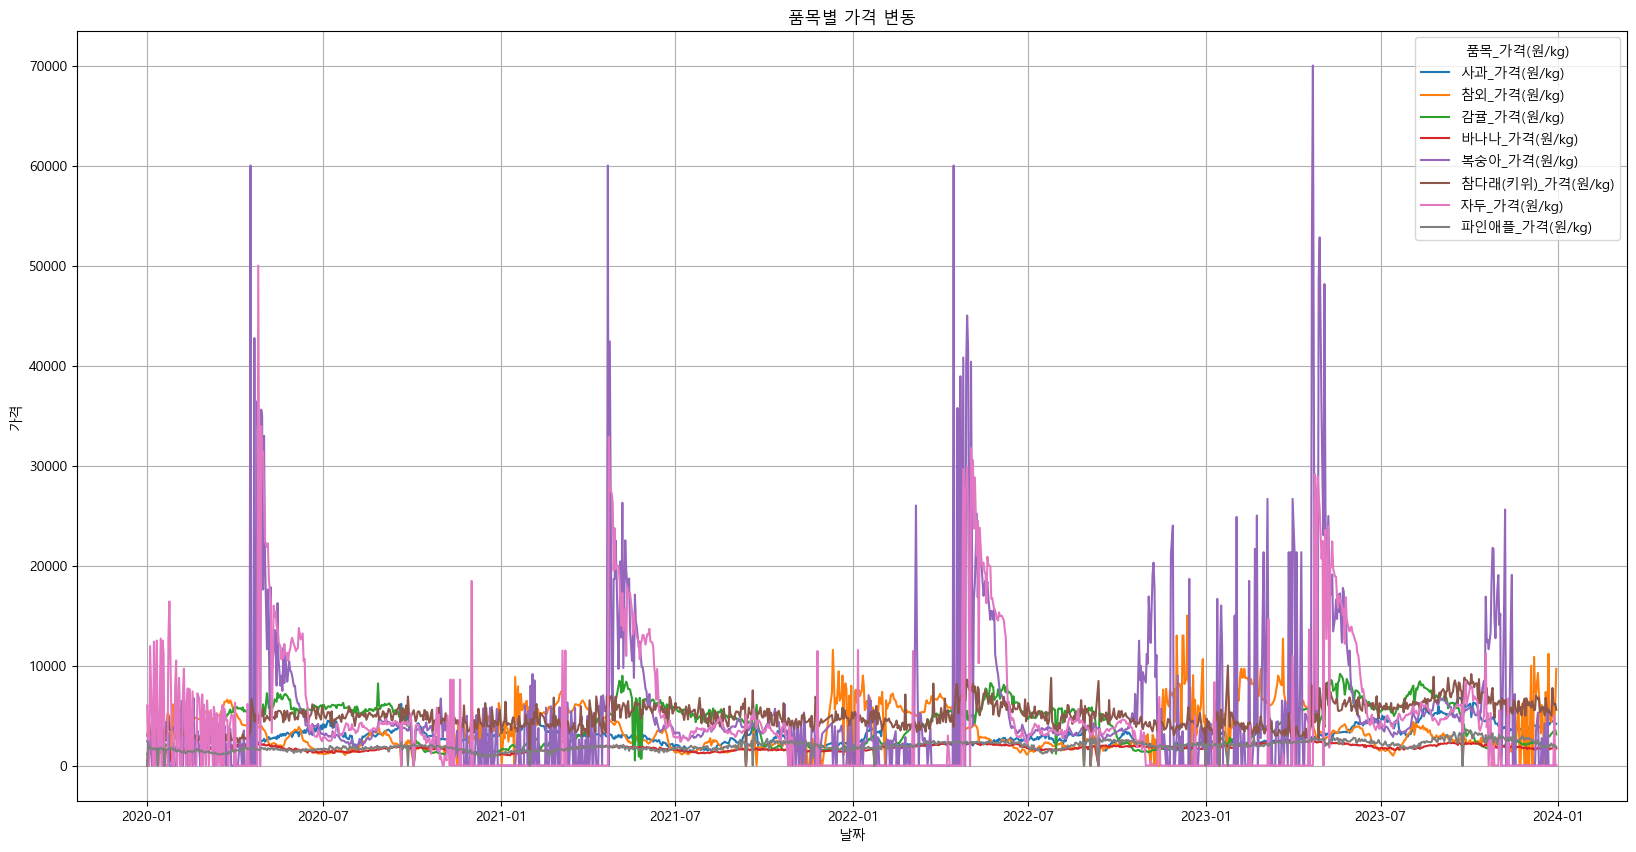

In [15]:
df['date'] =  pd.to_datetime(df['date'])
plt.figure(figsize=(20,10))

pum_price = df.filter(like='가격(원/kg)').columns

for i in pum_price:
        plt.plot(df['date'], df[i], label=i)

plt.title('품목별 가격 변동')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend(title='품목_가격(원/kg)')
plt.grid(True)
plt.show()

2.품목별 판매량 비교

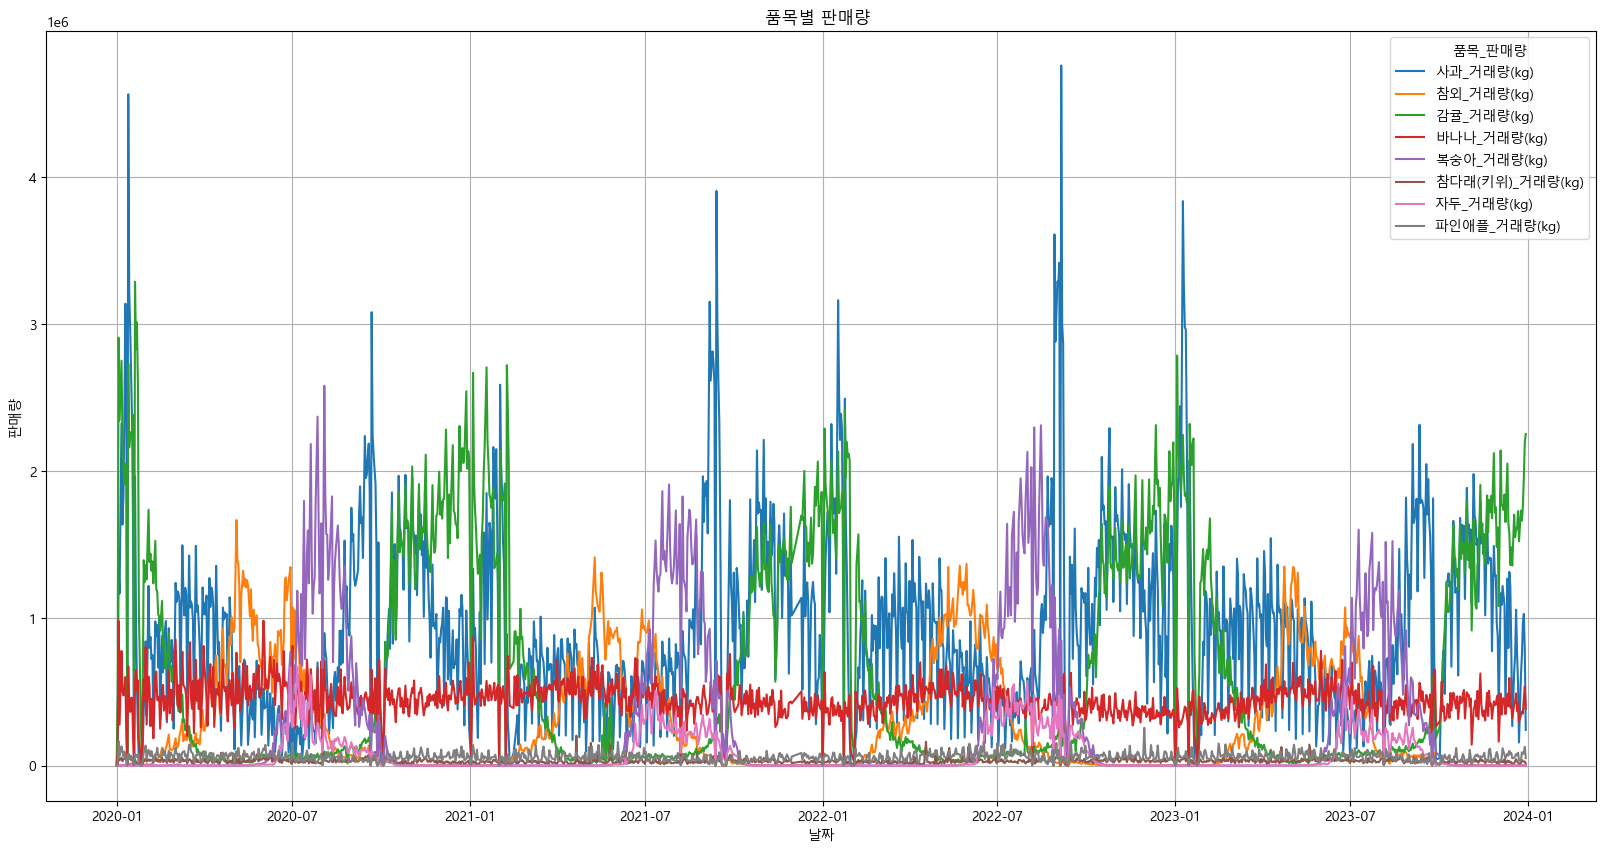

In [16]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(20,10))

pum_qty = df.filter(like='거래량(kg)').columns

for i in pum_qty:
    plt.plot(df['date'], df[i], label=i)

plt.title('품목별 판매량 ')
plt.xlabel('날짜')
plt.ylabel('판매량')
plt.legend(title='품목_판매량')
plt.grid(True)
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month']= df['date'].dt.to_period('M')

monthly_sales = pd.DataFrame()
for sub in pum:
    monthly_qty = df.groupby('month')[f'{sub}_거래량(kg)'].sum()
    monthly_sales[sub] = monthly_qty
    
monthly_sales = monthly_sales.reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)  # 월 컬럼을 문자열로 변환

# 시각화
plt.figure(figsize=(14, 8))

# 모든 품목의 월별 판매량을 선 그래프로 시각화
for sub in pum:
    plt.plot(monthly_sales['month'], monthly_sales[sub], label=sub)

plt.title('월별 품목별 판매량 비교')
plt.xlabel('월')
plt.ylabel('판매량 (kg)')
plt.legend(title='품목')
plt.tight_layout()
plt.show()

3. 품목별 가격 분포

C:\Users\user\AppData\Local\Temp\ipykernel_23732\4283575335.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='품목', y='가격', data=processed_df, palette=palette)


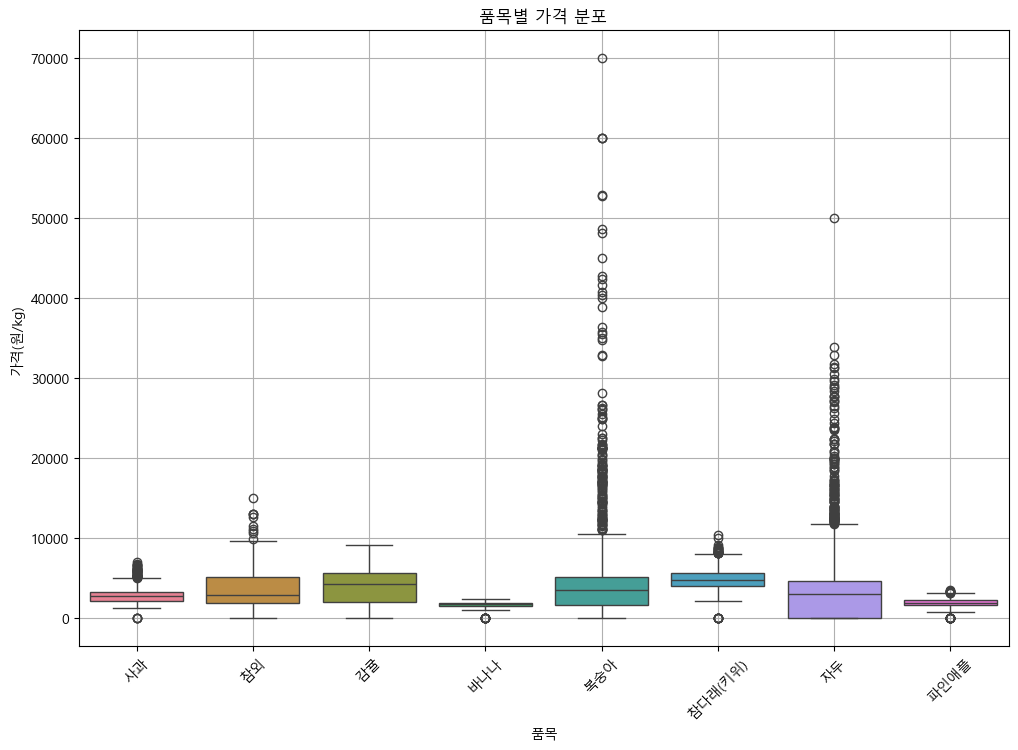

In [17]:
price_columns = df.filter(like='가격(원/kg)').columns

# 데이터 변형: 가격 컬럼별로 품목과 가격 정보 추출
processed_df = pd.melt(df, id_vars=[], value_vars=price_columns,
                var_name='품목_가격', value_name='가격')

processed_df['품목'] = processed_df['품목_가격'].str.split('_').str[0]
processed_df = processed_df.drop(columns=['품목_가격'])

plt.figure(figsize=(12, 8))
palette = sns.color_palette("husl", len(processed_df['품목'].unique()))
sns.boxplot(x='품목', y='가격', data=processed_df, palette=palette)

plt.title('품목별 가격 분포')
plt.xlabel('품목')
plt.ylabel('가격(원/kg)')
plt.xticks(rotation=45)  

plt.grid(True)
plt.show()

4. 월별 품목 순위

In [60]:
print("현재 데이터프레임의 열 이름:", df.columns)
print("Feature 변수:", feature)

현재 데이터프레임의 열 이름: Index(['date', '요일', '사과_거래량(kg)', '사과_가격(원/kg)', '참외_거래량(kg)', '참외_가격(원/kg)',
       '감귤_거래량(kg)', '감귤_가격(원/kg)', '바나나_거래량(kg)', '바나나_가격(원/kg)',
       '복숭아_거래량(kg)', '복숭아_가격(원/kg)', '참다래(키위)_거래량(kg)', '참다래(키위)_가격(원/kg)',
       '자두_거래량(kg)', '자두_가격(원/kg)', '파인애플_거래량(kg)', '파인애플_가격(원/kg)', 'month'],
      dtype='object')
Feature 변수: Index(['사과_거래량(kg)', '사과_가격(원/kg)', '참외_거래량(kg)', '참외_가격(원/kg)', '감귤_거래량(kg)',
       '감귤_가격(원/kg)', '바나나_거래량(kg)', '바나나_가격(원/kg)', '복숭아_거래량(kg)',
       '복숭아_가격(원/kg)', '참다래(키위)_거래량(kg)', '참다래(키위)_가격(원/kg)', '자두_거래량(kg)',
       '자두_가격(원/kg)', '파인애플_거래량(kg)', '파인애플_가격(원/kg)'],
      dtype='object')


- 과일별 월별 평균 가격

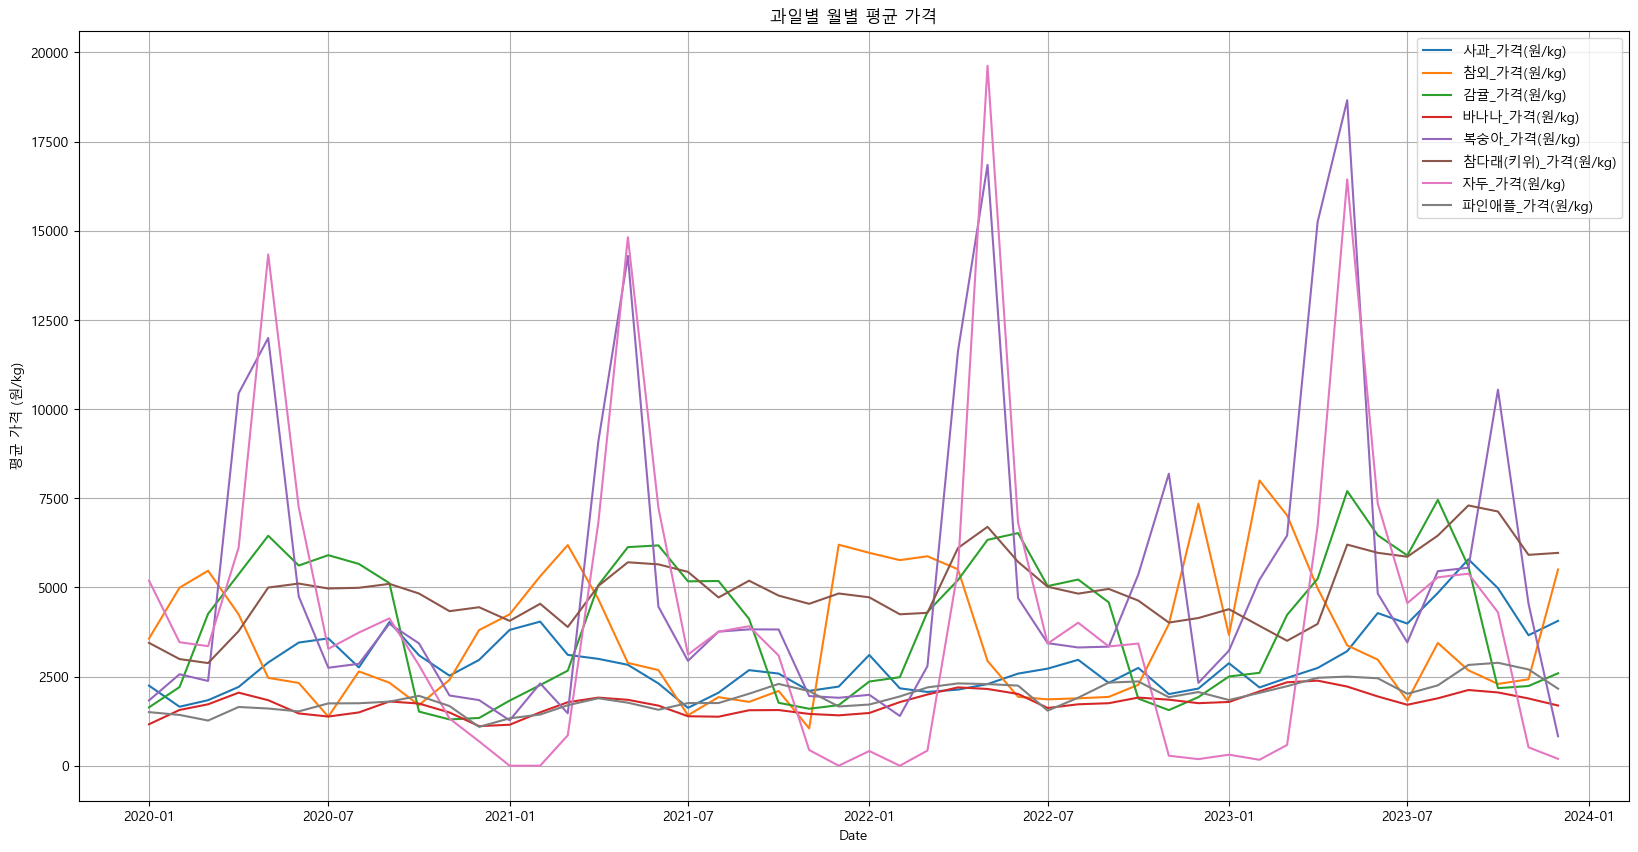

In [44]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')  # 월 단위로 변환

numeric_cols = df.select_dtypes(include='number')
df_monthly = numeric_cols.groupby(df['month']).mean().reset_index()  # 월별 평균 계산

plt.figure(figsize=(20, 10))

for column in df_monthly.columns:
    if '가격' in column:
        plt.plot(df_monthly['month'].dt.to_timestamp(), df_monthly[column], label=column)

plt.xlabel('Date')
plt.ylabel('평균 가격 (원/kg)')
plt.title('과일별 월별 평균 가격')
plt.legend(loc='best')
plt.grid(True)
plt.show()

- 과일별 월별 평균 거래량

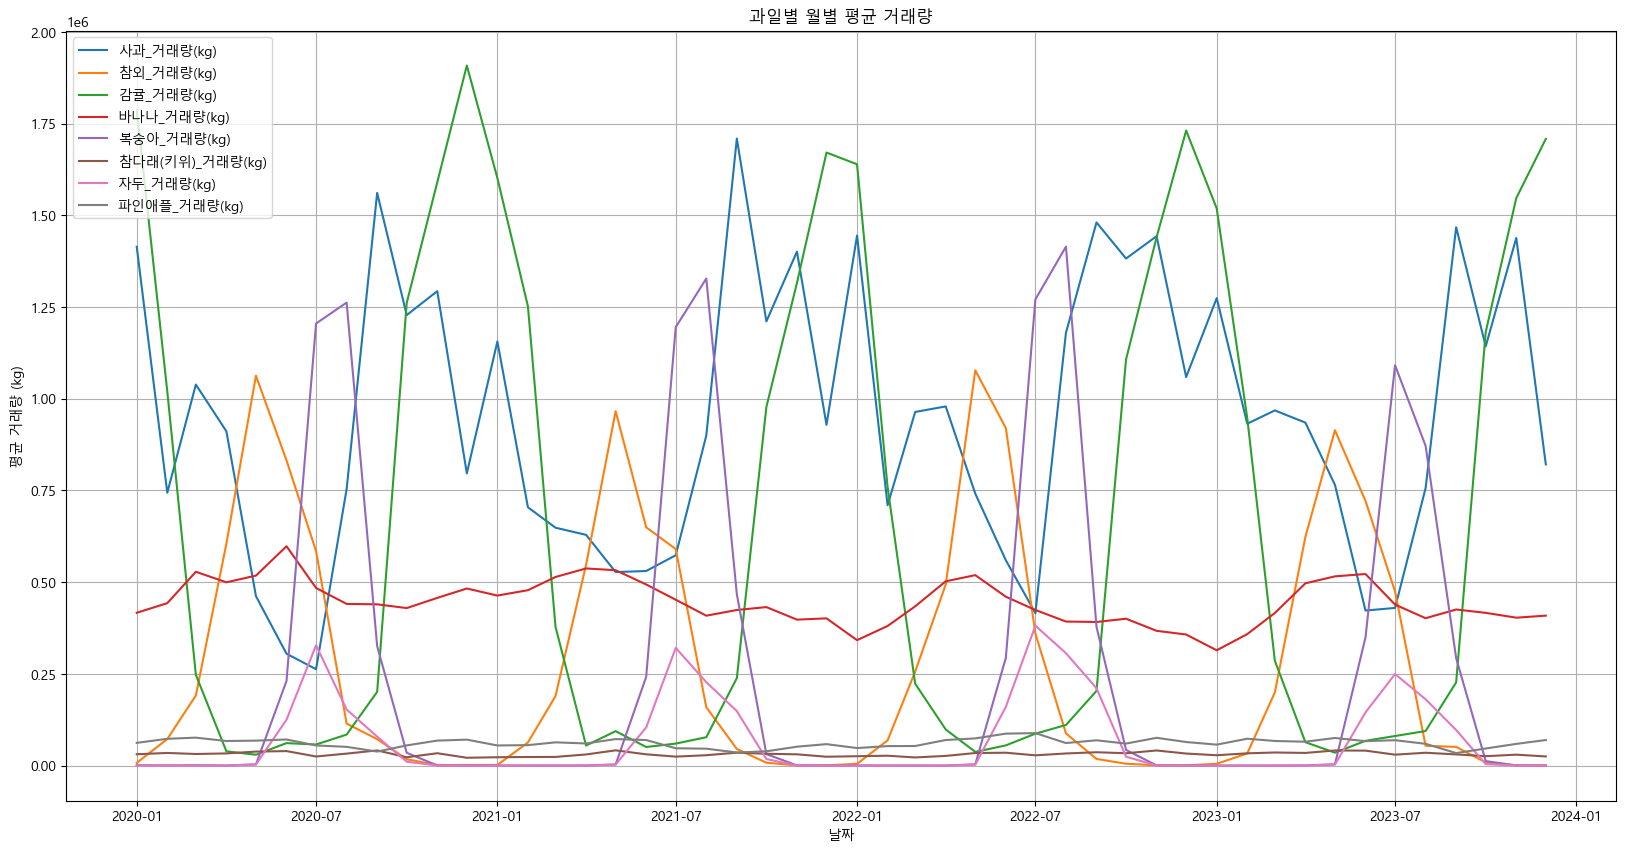

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 전처리
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')  # 월 단위로 변환

# 숫자형 열 선택
numeric_cols = df.select_dtypes(include='number')

# 월별 평균 거래량 계산
df_monthly_sales = numeric_cols.groupby(df['month']).mean().reset_index()  # 월별 평균 계산

# 시각화
plt.figure(figsize=(20, 10))

for column in df_monthly_sales.columns:
    if '거래량' in column:
        plt.plot(df_monthly_sales['month'].dt.to_timestamp(), df_monthly_sales[column], label=column)

plt.xlabel('날짜')
plt.ylabel('평균 거래량 (kg)')
plt.title('과일별 월별 평균 거래량')
plt.legend(loc='best')
plt.grid(True)
plt.show()


- 월별 평균거래량 비교

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\

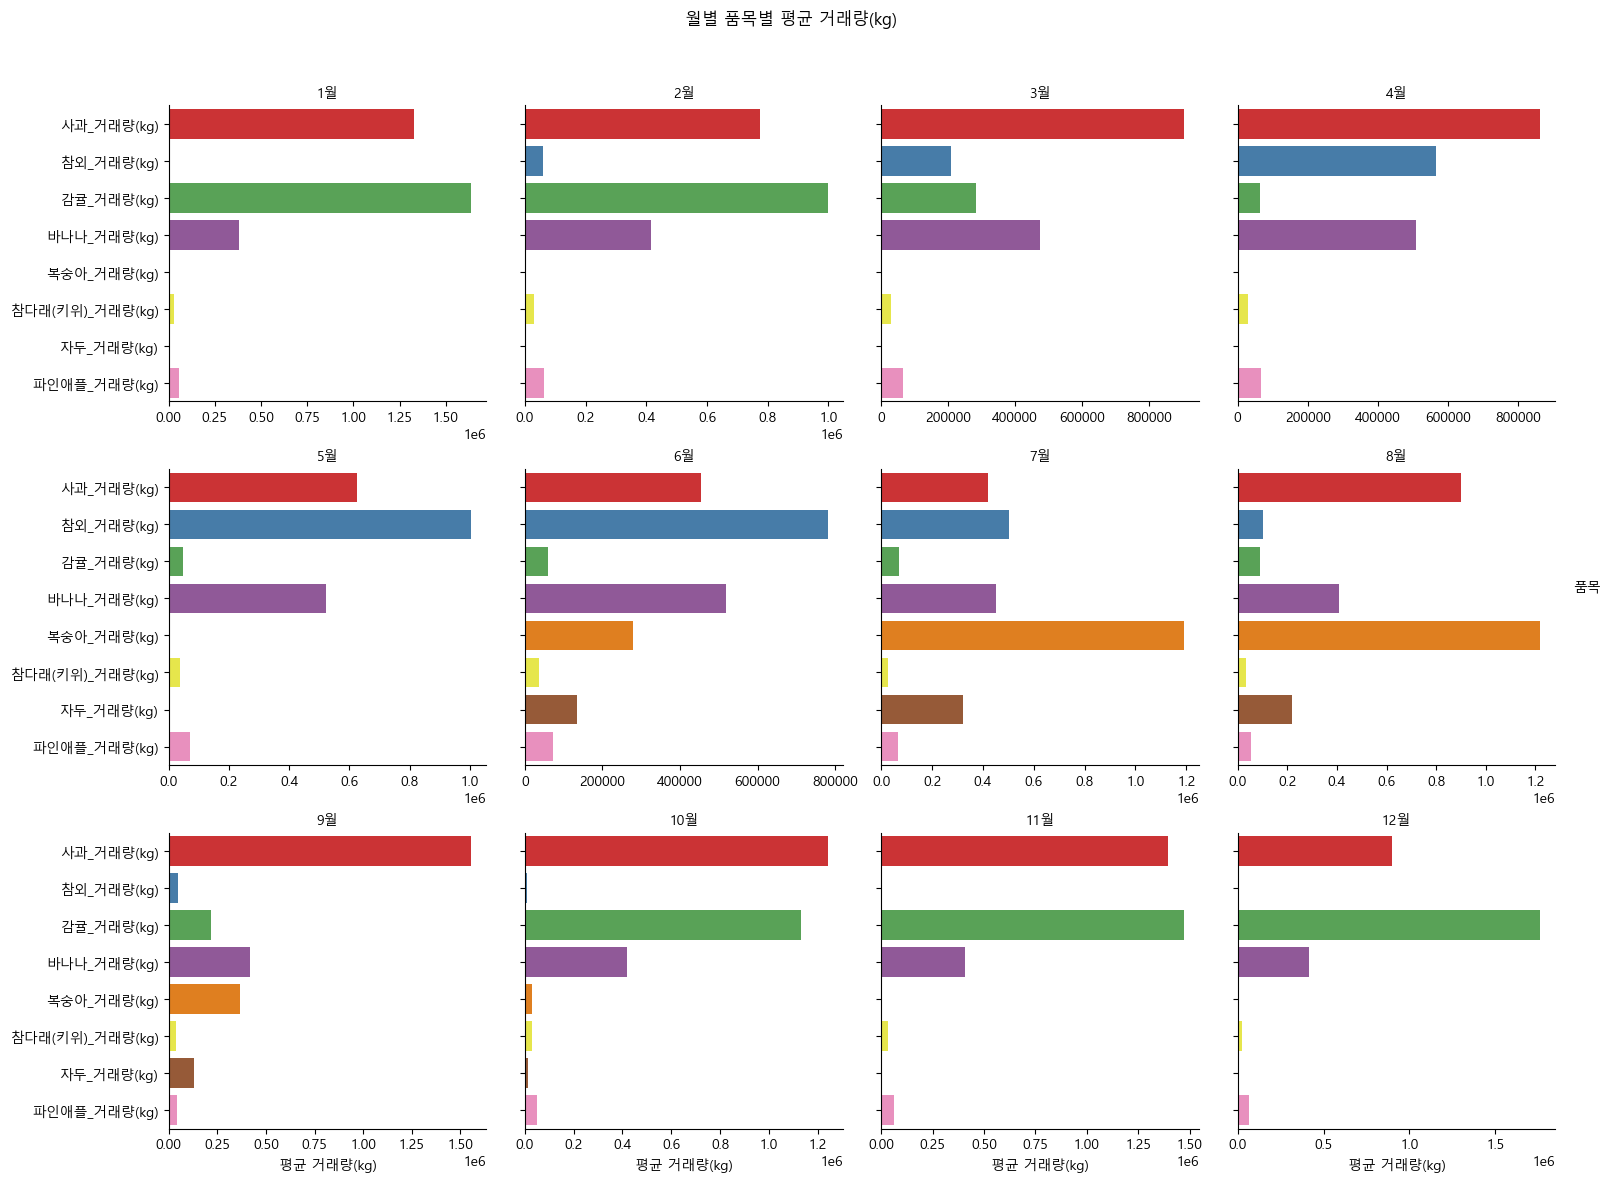

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\

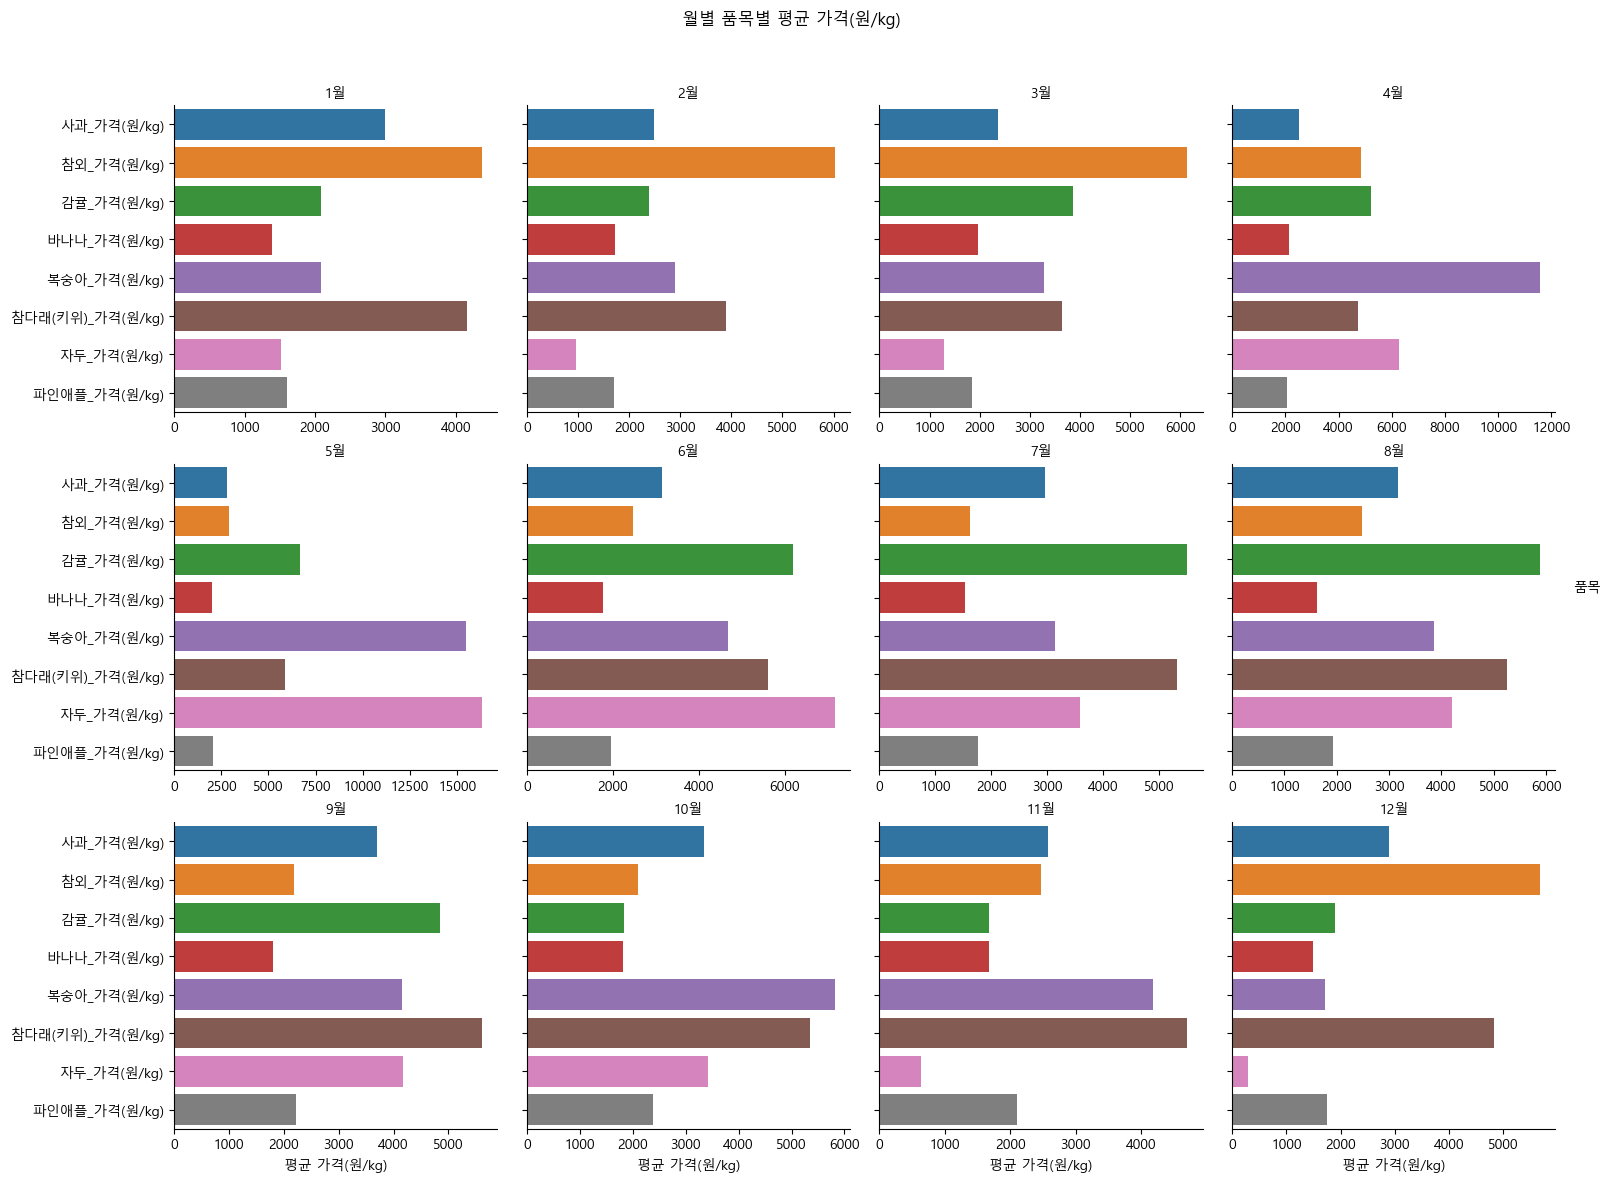

In [92]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month  # 월 단위로 변환


numeric_cols = df.select_dtypes(include='number')

df_monthly_means = df.copy()
df_monthly_means = df_monthly_means.groupby('month').mean(numeric_only=True).reset_index()

# 거래량 및 가격 열 필터링
qty_cols = [col for col in df_monthly_means.columns if '거래량' in col]
price_cols = [col for col in df_monthly_means.columns if '가격' in col]


df_qty_long = df_monthly_means.melt(id_vars='month', value_vars=qty_cols,var_name='품목', value_name='평균 거래량')
df_price_long = df_monthly_means.melt(id_vars='month', value_vars=price_cols, var_name='품목', value_name='평균 가격')

# 거래량 시각화
g_qty = sns.FacetGrid(df_qty_long, col="month", col_wrap=4, height=4, sharex=False, sharey=True)
g_qty.map_dataframe(sns.barplot, x='평균 거래량', y='품목', palette='Set1')
g_qty.set_titles(col_template='{col_name}월')
g_qty.set_axis_labels('평균 거래량(kg)', '')
g_qty.add_legend(title='품목')
g_qty.set(xlim=(0, None))  # x축 범위 자동 설정
plt.subplots_adjust(top=0.9)
g_qty.fig.suptitle('월별 품목별 평균 거래량(kg)')
plt.show()

# 가격 시각화
g_price = sns.FacetGrid(df_price_long, col="month", col_wrap=4, height=4, sharex=False, sharey=True)
g_price.map_dataframe(sns.barplot, x='평균 가격', y='품목', palette='tab10')
g_price.set_titles(col_template='{col_name}월')
g_price.set_axis_labels('평균 가격(원/kg)', '')
g_price.add_legend(title='품목')
g_price.set(xlim=(0, None))  # x축 범위 자동 설정
plt.subplots_adjust(top=0.9)
g_price.fig.suptitle('월별 품목별 평균 가격(원/kg)')
plt.show()

5. 년도별 폼목 순위

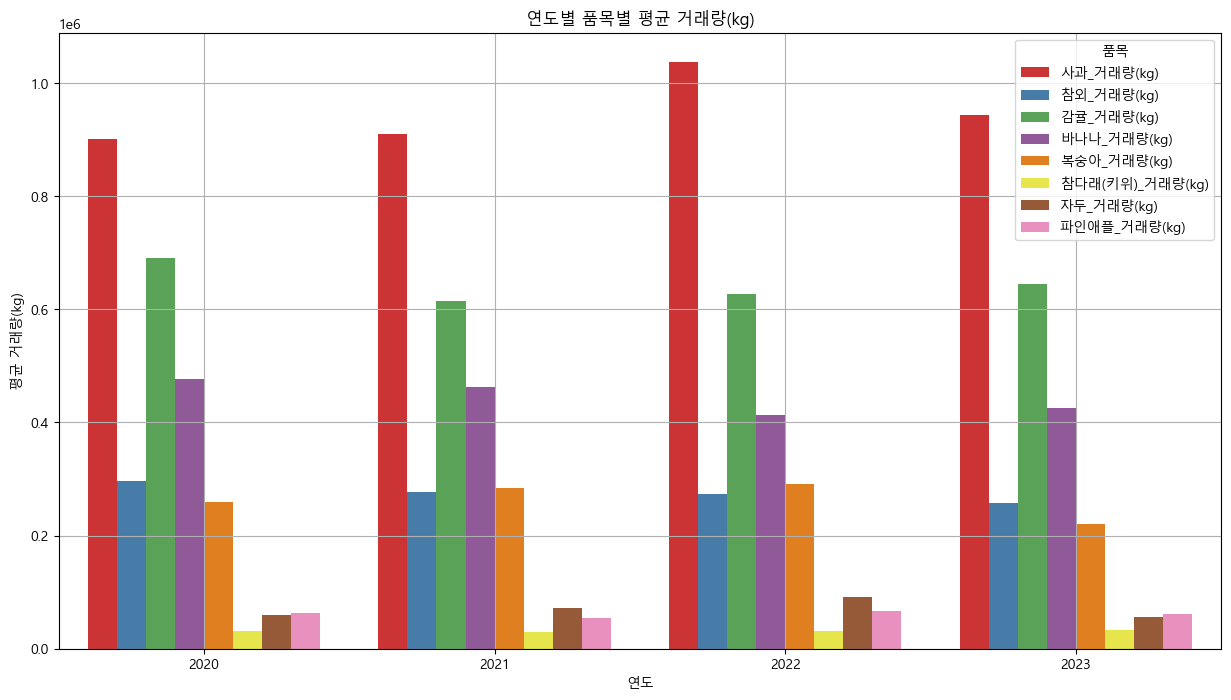

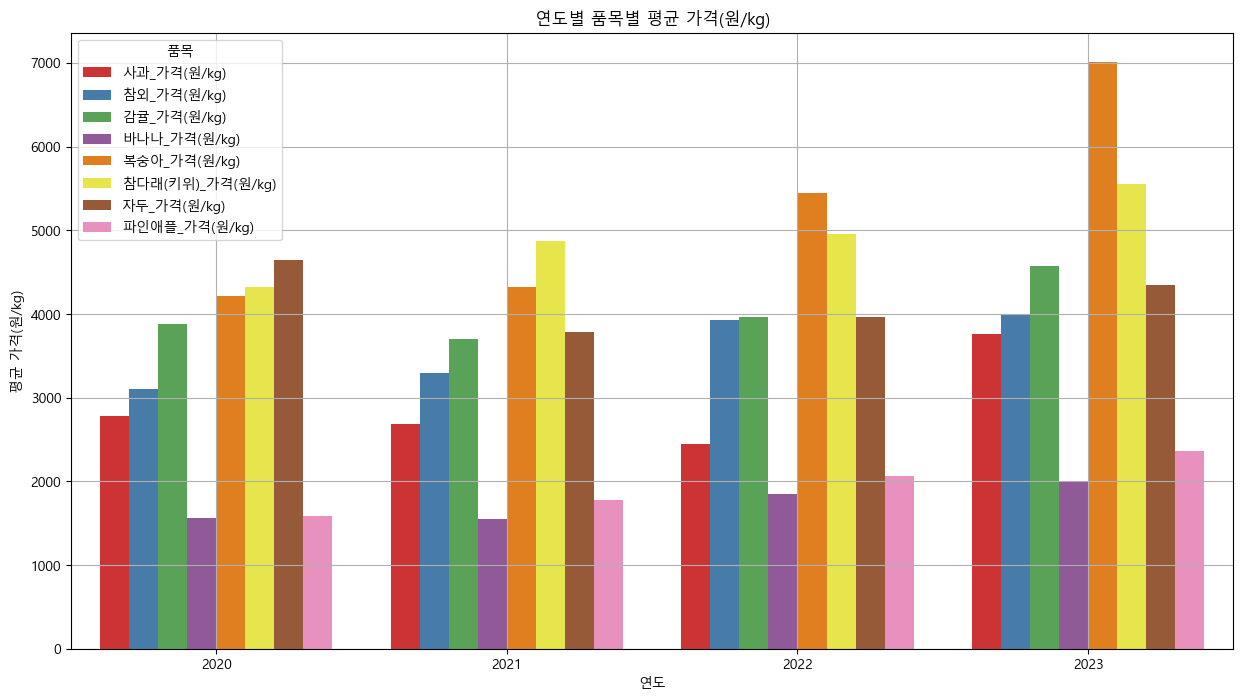

In [76]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# 연도별 월별 평균 계산
df_yearly_means = df.groupby('year').mean(numeric_only=True).reset_index()

qty_cols = [col for col in df_yearly_means.columns if '거래량' in col]
price_cols = [col for col in df_yearly_means.columns if '가격' in col]

df_qty_long = df_yearly_means.melt(id_vars='year', value_vars=qty_cols, var_name='품목', value_name='평균 거래량')
df_price_long = df_yearly_means.melt(id_vars='year', value_vars=price_cols, var_name='품목', value_name='평균 가격')

# 거래량 시각화
plt.figure(figsize=(15, 8))
sns.barplot(data=df_qty_long, x='year', y='평균 거래량', hue='품목', palette='Set1')
plt.xlabel('연도')
plt.ylabel('평균 거래량(kg)')
plt.title('연도별 품목별 평균 거래량(kg)')
plt.legend(title='품목')
plt.grid(True)
plt.show()

# 가격 시각화
plt.figure(figsize=(15, 8))
sns.barplot(data=df_price_long, x='year', y='평균 가격', hue='품목', palette='Set1')
plt.xlabel('연도')
plt.ylabel('평균 가격(원/kg)')
plt.title('연도별 품목별 평균 가격(원/kg)')
plt.legend(title='품목')
plt.grid(True)
plt.show()

- 연도별 품목 거래량과 가격 비교

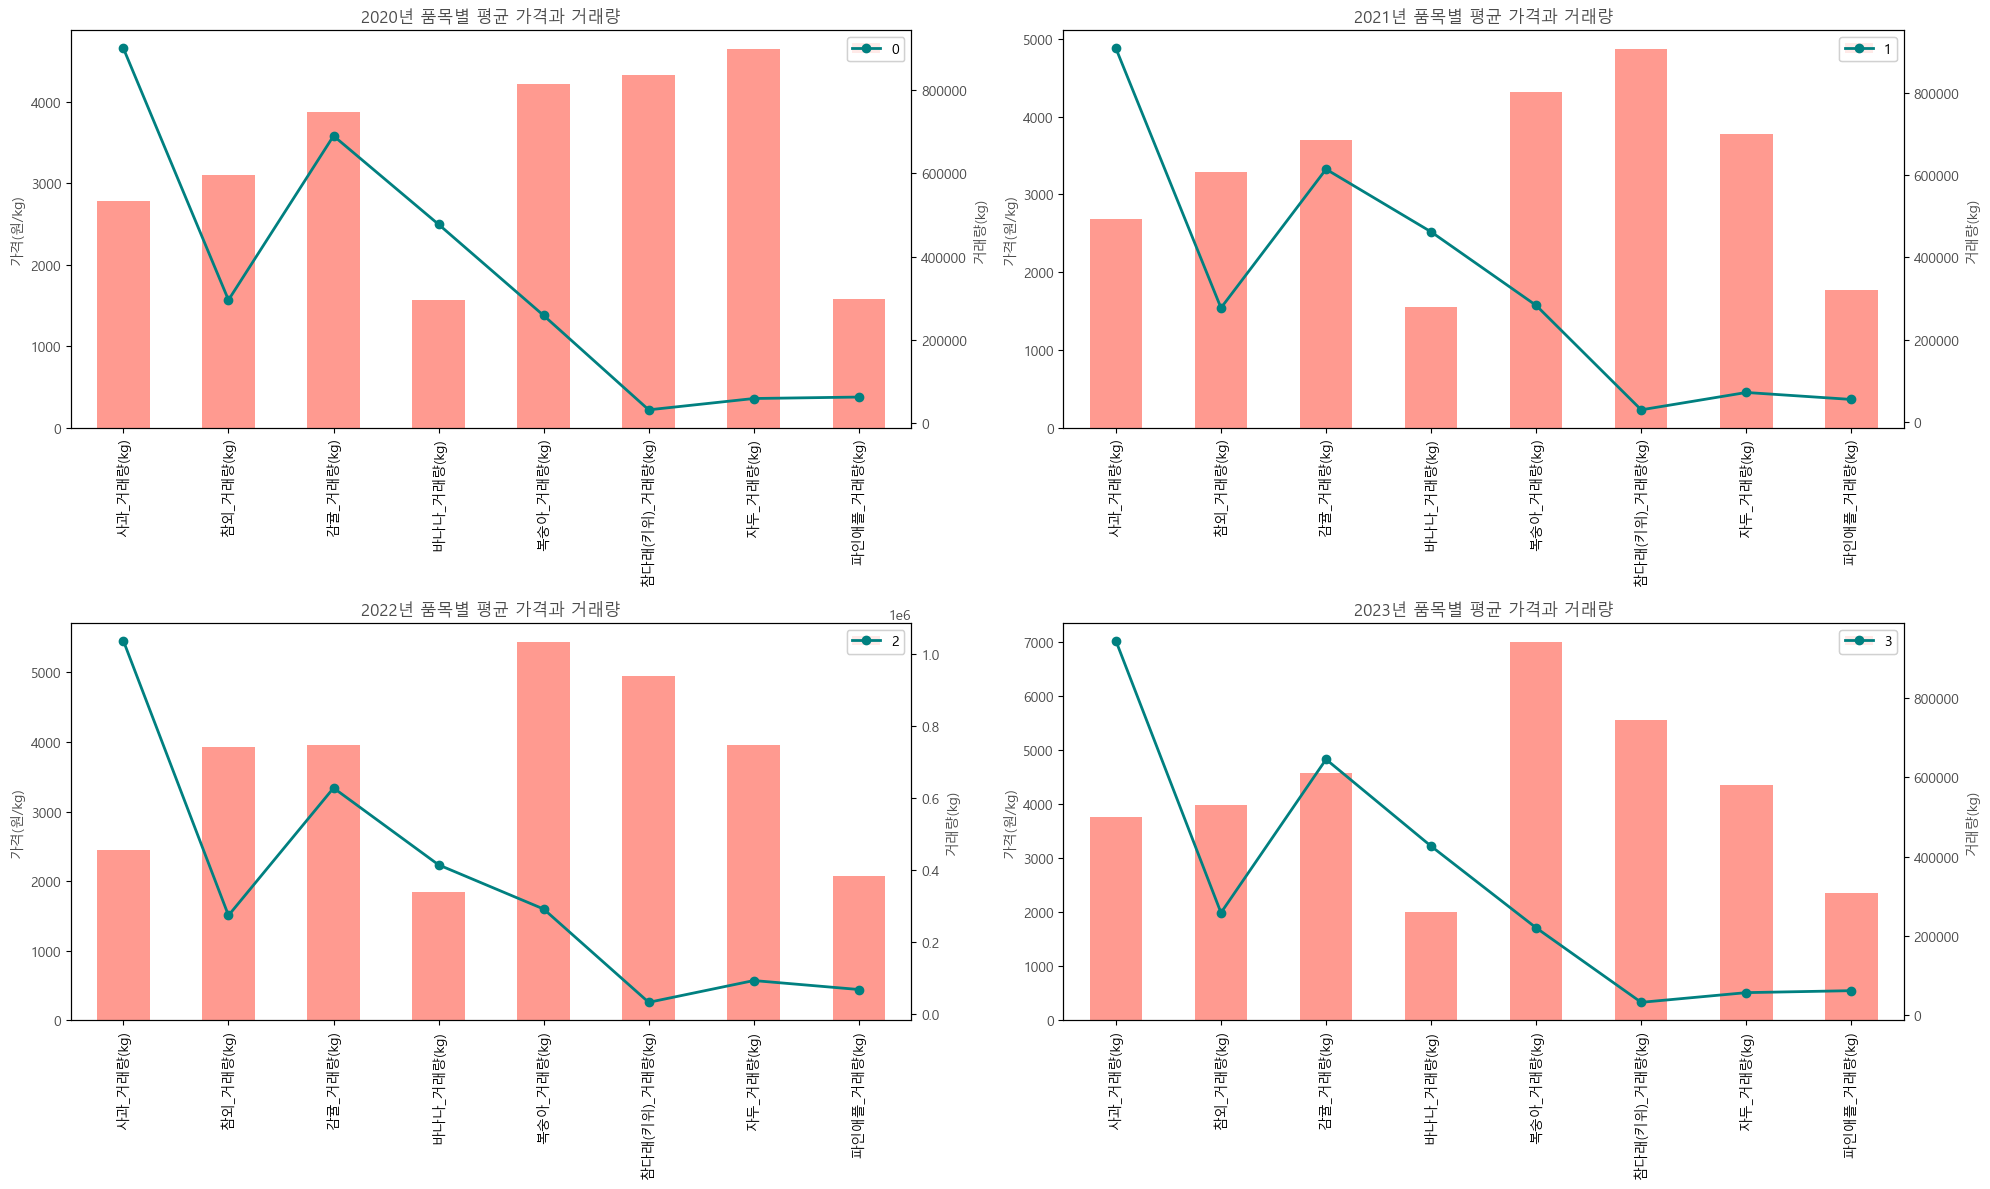

In [78]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year  

df_yearly_means = df.groupby('year').mean(numeric_only=True).reset_index()

qty_cols = [col for col in df_yearly_means.columns if '거래량' in col]
price_cols = [col for col in df_yearly_means.columns if '가격' in col]

years = df_yearly_means['year'].unique()

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for i, year in enumerate(years):
    ax1 = axes[i]     
    ax2 = ax1.twinx()  

    df_yearly_means[df_yearly_means['year'] == year][price_cols].T.plot(kind='bar', ax=ax1, color='#FF6F61', alpha=0.7)
    ax1.set_ylabel('가격(원/kg)', color='#4B4B4B')
    ax1.tick_params(axis='y', labelcolor='#4B4B4B')

    df_yearly_means[df_yearly_means['year'] == year][qty_cols].T.plot(kind='line', ax=ax2, color='#008080', marker='o', linestyle='-', linewidth=2)
    ax2.set_ylabel('거래량(kg)', color='#4B4B4B')
    ax2.tick_params(axis='y', labelcolor='#4B4B4B')

    ax1.set_title(f'{year}년 품목별 평균 가격과 거래량', color='#4B4B4B')

plt.tight_layout()
plt.show()
